# Area & Population of California Cities

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\\california_cities.csv')
df.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [4]:
df.shape

(482, 14)

In [5]:
df.size

6748

In [6]:
df.columns

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0              int64
city                   object
latd                  float64
longd                 float64
elevation_m           float64
elevation_ft          float64
population_total        int64
area_total_sq_mi      float64
area_land_sq_mi       float64
area_water_sq_mi      float64
area_total_km2        float64
area_land_km2         float64
area_water_km2        float64
area_water_percent    float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [23]:
df.isna().sum()

city                  0
latd                  0
longd                 0
elevation_ft          0
population_total      0
area_land_sq_mi       0
area_water_sq_mi      0
area_total_km2        5
area_land_km2         4
area_water_km2        4
area_water_percent    5
elevation_m           0
area_total_sq_mi      0
dtype: int64

### Drop unnanemd column

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

### Impute missing values

#### Missing value in elevation_m & elevation_ft

In [4]:
df.drop('elevation_m', axis=1, inplace=True)
df.elevation_ft.fillna(0, inplace=True)
df['elevation_m']=df['elevation_ft']/3.2808399

#### Missing value in area_water_sq_mi, area_land_sq_mi, area_total_sq_mi

In [5]:
df['area_water_sq_mi'].fillna(0, inplace=True)
df.drop('area_total_sq_mi', axis=1, inplace=True)
df['area_total_sq_mi']=df['area_water_sq_mi']+df['area_land_sq_mi']

In [6]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

city                  0
latd                  0
longd                 0
elevation_ft          0
population_total      0
area_land_sq_mi       0
area_water_sq_mi      0
area_total_km2        0
area_land_km2         0
area_water_km2        0
area_water_percent    0
elevation_m           0
area_total_sq_mi      0
dtype: int64

In [7]:
df=df[['city','latd','longd','population_total','elevation_ft','elevation_m','area_land_sq_mi',
      'area_water_sq_mi','area_total_sq_mi','area_land_km2','area_water_km2','area_total_km2','area_water_percent']]
df.head()

,city,latd,longd,population_total,elevation_ft,elevation_m,area_land_sq_mi,area_water_sq_mi,area_total_sq_mi,area_land_km2,area_water_km2,area_total_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,31765,2871.0,875.080799,56.009,0.018,56.027,145.062,0.046,145.107,0.03
1,AgouraHills,34.153333,-118.761667,20330,922.0,281.025600,7.793,0.029,7.822,20.184,0.076,20.260,0.37
2,Alameda,37.756111,-122.274444,75467,33.0,10.058400,10.611,12.349,22.960,27.482,31.983,59.465,53.79
3,Albany,37.886944,-122.297778,18969,43.0,13.106400,1.788,3.677,5.465,4.632,9.524,14.155,67.28
4,Alhambra,34.081944,-118.135000,83089,492.0,149.961600,7.631,0.001,7.632,19.763,0.003,19.766,0.01


### Top 10 Cities by Population

In [28]:
pop_top=pd.pivot_table(df, index='city', values='population_total',
                   aggfunc=sum).sort_values(by='population_total', ascending=False)[:10]
pop_top

,population_total
city,
LosAngeles,3884307
SanDiego,1345895
SanJose,1000536
Fresno,509039
Sacramento,466488
LongBeach,462257
Oakland,406253
Bakersfield,347483
Anaheim,336000


### Bottom 10 cities by population

In [29]:
pop_bottom=pd.pivot_table(df, index='city', values='population_total',
                   aggfunc=sum).sort_values(by='population_total')[:10]
pop_bottom

,population_total
city,
Pomona,1
Vernon,112
AmadorCity,185
Industry,219
SandCity,334
Trinidad,367
Tehama,418
PointArena,449
Etna,737


**Pomona city has lowest population i.e 1, and LosAngeles city has highest population 3884307**.

### Top 10 cities by Elevation

In [31]:
ele_top=pd.pivot_table(df, index='city', values='elevation_m',
                   aggfunc=sum).sort_values(by='elevation_m', ascending=False)[:10]
ele_top

,elevation_m
city,
MammothLakes,2401.823996
BigBearLake,2058.009597
SouthLakeTahoe,1901.037597
Truckee,1773.021597
Loyalton,1509.064798
Portola,1480.108798
Alturas,1331.975998
Dorris,1293.875998
Susanville,1275.892798


### Bottom 10 cities by elevation

In [30]:
ele_bottom=pd.pivot_table(df, index='city', values='elevation_m',
                   aggfunc=sum).sort_values(by='elevation_m')[:10]
ele_bottom

,elevation_m
city,
Calipatria,-54.8640
Westmorland,-49.9872
Brawley,-34.1376
Coachella,-20.1168
Imperial,-17.9832
ElCentro,-11.8872
Indio,-3.9624
Holtville,-3.0480
Ventura,0.0000


**Calipatria city has lowest elevation & MammothLakes city has highest Elevation.**

### Top 10 Cities by land area

In [9]:
land_top=pd.pivot_table(df, index='city', values='area_land_sq_mi',
                   aggfunc=sum).sort_values(by='area_land_sq_mi', ascending=False)[:10]
land_top

,area_land_sq_mi
city,
LosAngeles,469.000
SanDiego,325.190
CaliforniaCity,203.523
SanJose,176.526
Bakersfield,142.164
Fresno,111.957
Palmdale,105.961
Sacramento,97.915
Lancaster,94.276


### Bottom 10 cities by land area

In [10]:
land_bottom=pd.pivot_table(df, index='city', values='area_land_sq_mi',
                   aggfunc=sum).sort_values(by='area_land_sq_mi',ascending=True)[:10]
land_bottom

,area_land_sq_mi
city,
AmadorCity,0.314
Loyalton,0.355
Tulelake,0.410
Isleton,0.440
DelReyOaks,0.481
Trinidad,0.485
Belvedere,0.519
SandCity,0.562
Westmorland,0.590


**Amador City has lowest land area & Loss Angeles has highest land area.**

### Top 10 cities by water area

In [11]:
water_top=pd.pivot_table(df, index='city', values='area_water_sq_mi',
                   aggfunc=sum).sort_values(by='area_water_sq_mi', ascending=False)[:10]
water_top

,area_water_sq_mi
city,
SanDiego,47.210
LosAngeles,34.000
NewportBeach,29.173
Coronado,24.735
DanaPoint,22.987
SantaBarbara,22.500
Richmond,22.412
Oakland,22.216
SouthSanFrancisco,21.017


### Bottom 10 cities by water area

In [12]:
water_bottom=pd.pivot_table(df, index='city', values='area_water_sq_mi',
                   aggfunc=sum).sort_values(by='area_water_sq_mi',ascending=True)[:10]
water_bottom

,area_water_sq_mi
city,
YuccaValley,0.0
Portola,0.0
Duarte,0.0
PointArena,0.0
ElCajon,0.0
PleasantHill,0.0
ElCerrito,0.0
Piedmont,0.0
Patterson,0.0


**SanDiego has highest water area.**

### Top 10 cities by total area

In [14]:
total_top=pd.pivot_table(df, index='city', values='area_total_sq_mi',
                   aggfunc=sum).sort_values(by='area_total_sq_mi', ascending=False)[:10]
total_top

,area_total_sq_mi
city,
LosAngeles,503.000
SanDiego,372.400
CaliforniaCity,203.631
SanJose,179.965
Bakersfield,143.609
Fresno,112.308
Palmdale,106.216
Sacramento,100.105
PalmSprings,94.975


### Bottom 10 cities by total area

In [15]:
total_bottom=pd.pivot_table(df, index='city', values='area_total_sq_mi',
                   aggfunc=sum).sort_values(by='area_total_sq_mi',ascending=True)[:10]
total_bottom

,area_total_sq_mi
city,
AmadorCity,0.314
Loyalton,0.355
Tulelake,0.412
DelReyOaks,0.483
Isleton,0.492
Westmorland,0.590
FortJones,0.602
BlueLake,0.622
Biggs,0.636


**Amador City has least total area & LosAngeles has highest total area.**

### Top 10 cities by water area percentage

In [17]:
water_perc_top=pd.pivot_table(df, index='city', values='area_water_percent',
                   aggfunc=sum).sort_values(by='area_water_percent', ascending=False)[:10]
water_perc_top

,area_water_percent
city,
Brisbane,84.58
FosterCity,81.07
SandCity,80.77
Belvedere,78.42
DanaPoint,77.96
Coronado,75.72
PismoBeach,73.29
Carpinteria,72.11
SouthSanFrancisco,69.69


### Bottom 10 cities by water area percentage

In [16]:
water_perc_bottom=pd.pivot_table(df, index='city', values='area_water_percent',
                   aggfunc=sum).sort_values(by='area_water_percent',ascending=True)[:10]
water_perc_bottom

,area_water_percent
city,
YuccaValley,0.0
LiveOakSutterCounty,0.0
Livingston,0.0
Lomita,0.0
Corning,0.0
Corcoran,0.0
Concord,0.0
Loomis,0.0
Colusa,0.0


**Out of total area Brisbane city has 84% water area.**

### Relationship between area and population

In [25]:
fig=px.scatter(data_frame=df,
              x='area_total_sq_mi',
              y='population_total',
              size='population_total',
              color='city',
              title='Relationship between Area & Population')
fig.show()

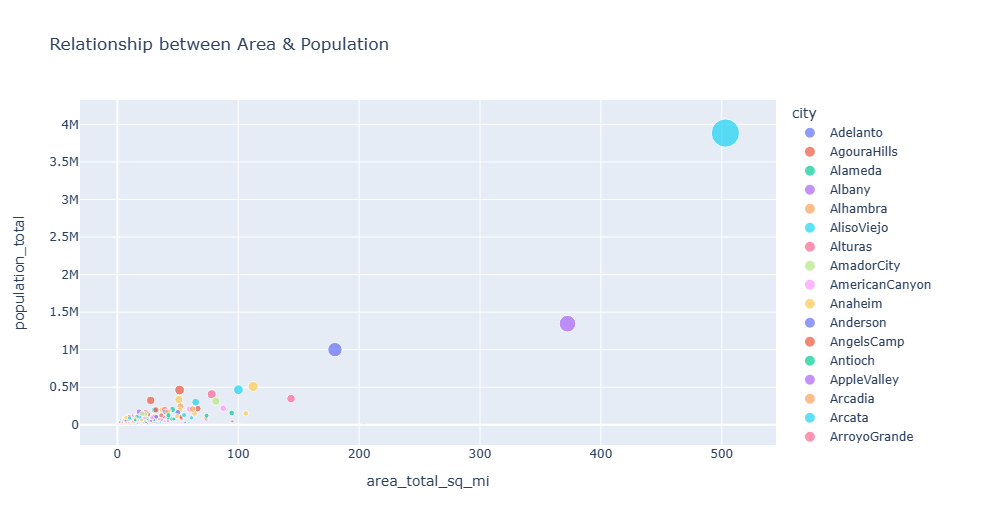

### Conclusion:
1. **Pomona city has lowest population i.e 1, and LosAngeles city has highest population 3884307**
2. **Calipatria city has lowest elevation & MammothLakes city has highest Elevation.**
3. **Amador City has lowest land area & Loss Angeles has highest land area.**
4. **SanDiego has highest water area.**
5. **Amador City has least total area & LosAngeles has highest total area.**
6. **Out of total area Brisbane city has 84% water area.**